In [2]:
import numpy as np
data=np.genfromtxt("/home/limu/Space/calib/coatings_new.csv",skip_header=36,delimiter=';').T

In [3]:
sect=np.where(data[:,0]==130)[0] #input, detailed channel anal., new ZEMAX simul

In [4]:
tlist=['FUVbms','NUVprim_coat','ALMgF_prim_coat','AR_corr','NUVrefl ASAHI','FUV refl TOPTEC','NUVtrans ASAHI']#,"NUV rot.TOPTEC"]
torigin=['FUV/NUV beamsplitter @CaF2',
 'NUV enhanced mirror coatings',
 'FUV+NUV Al+MgF2 mirror coating',
 'AR on corrector lens',
 'NUV/VIS reflective filter',
 'FUV reflective filter',
 'NUV/VIS 220-300 nm trans. filter',
 'NUV1/NUV2 220-290/290-360 @45° BS ']
spec={}
for i in range(len(tlist)):
    spec[tlist[i]]=data[1+5*i:5+5*i]/100

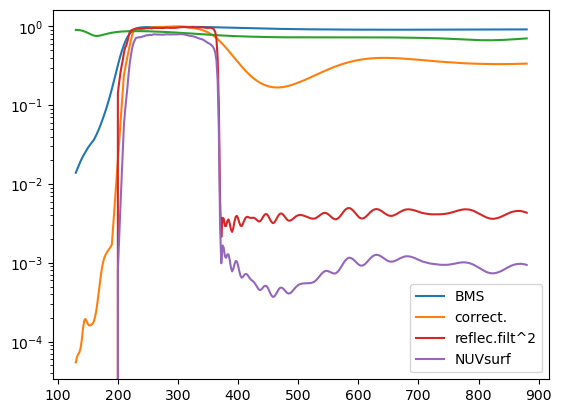

In [8]:
from matplotlib import pyplot as pl
l=data[0]
pl.semilogy(l,spec['FUVbms'][1],label="BMS")
#pl.plot(l,spec['NUVprim_coat'][0])
pl.plot(l,spec['AR_corr'][1]**7, label='correct.')
pl.plot(l,spec['ALMgF_prim_coat'][0]**2)
pl.plot(l,spec['NUVrefl ASAHI'][0]**2,label="reflec.filt^2")
spec['NUVsurf_comb']=[spec['ALMgF_prim_coat'][0+i]**2*spec['FUVbms'][1+i]*spec['AR_corr'][1+i]**7*spec['NUVrefl ASAHI'][0+i]**2 for i in [0,2]]
pl.plot(l,spec['NUVsurf_comb'][0],label='NUVsurf')

pl.legend()

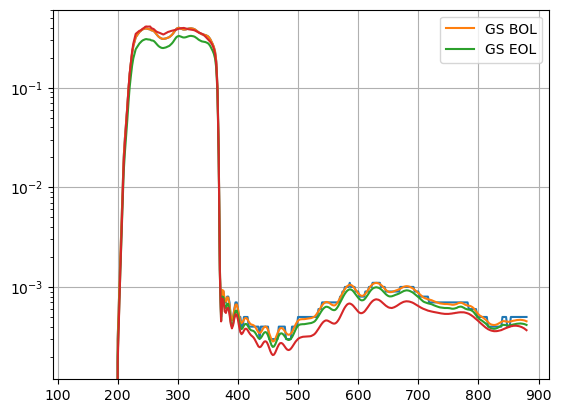

In [12]:
spec['GSense']=data[sect[1]+3]/100
spec['ULTRAsat']=data[sect[1]+16]/100

tcomb1=data[sect[1]+4:sect[1]+16]/100
l=data[0]
pl.semilogy(l,tcomb1[0])
#pl.plot(l,tcomb1[1])
pl.plot(l,spec['NUVsurf_comb'][0]*spec['GSense'],label="GS BOL")
pl.plot(l,spec['NUVsurf_comb'][1]*spec['GSense'],label="GS EOL")
pl.plot(l,spec['NUVsurf_comb'][1]*spec['ULTRAsat'])
pl.grid()
pl.legend()

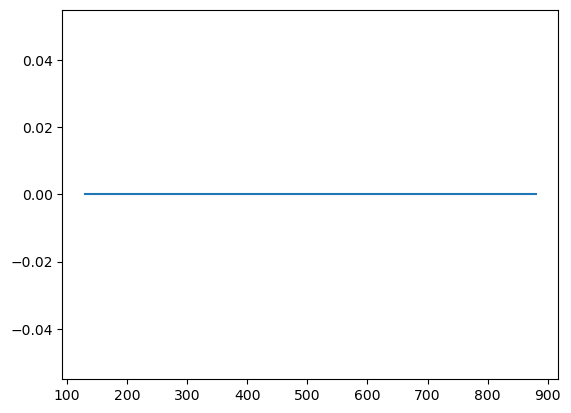

In [64]:
#pl.plot(l,spec['FUV refl TOPTEC'][0])
pl.plot(l,spec['FUV refl TOPTEC'][3])
#pl.plot(l,spec["NUV rot.TOPTEC"][0])

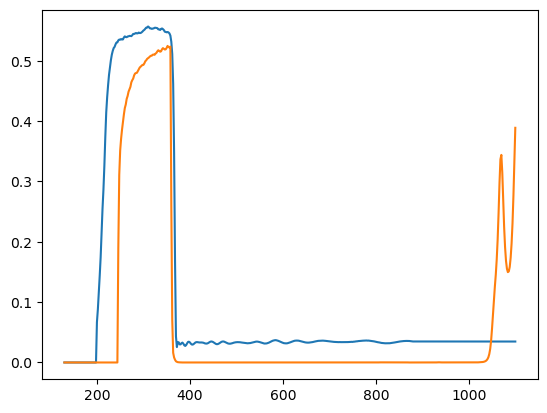

In [47]:
tcomb2=data[sect[2]+1:sect[2]+7]/100
pl.plot(l,tcomb2[0])
pl.plot(l,tcomb2[2])

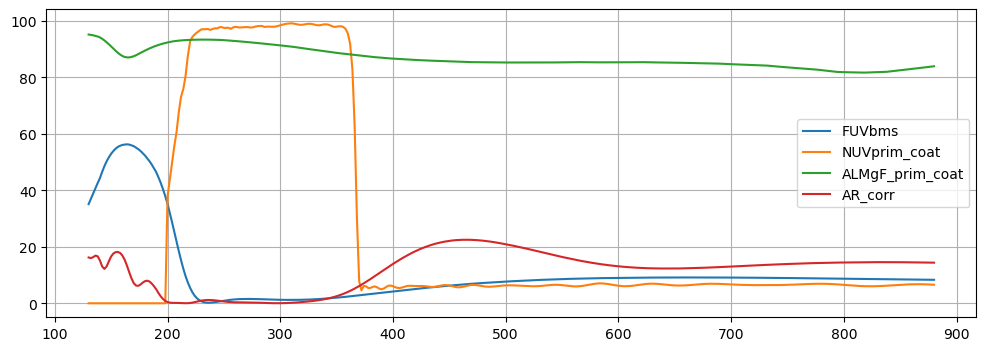

In [19]:

l=data[0]
from matplotlib import pyplot as pl
pl.figure(figsize=(12,4))
for i in [0,1,2,3]:
    pl.plot(l,spec[tlist[i]][0],label=tlist[i])

#pl.xlim(None,400)
pl.grid()
pl.legend()

In [10]:
sel=l>365
sel=(l>240)*(l<355)
np.mean((spec[tlist[4]][0][sel]/100)**2)

0.9641131864912281

In [16]:
sel=l>365
sel=(l>240)*(l<355)
sel=(l>260)*(l<300)
np.mean((spec[tlist[5]][1][sel]/100))

0.8082

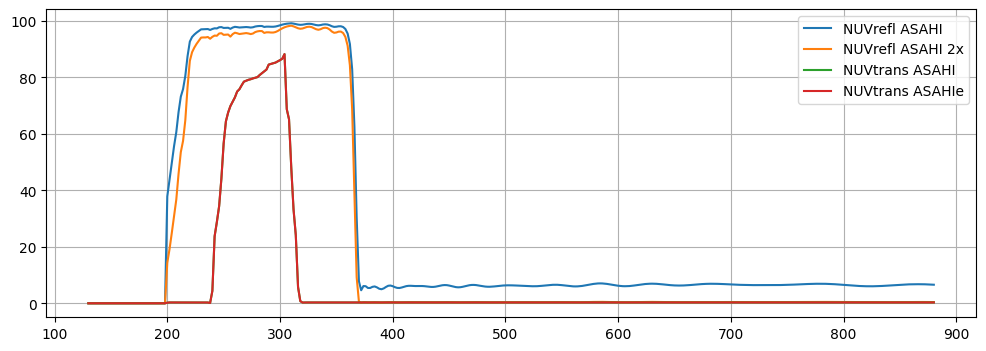

In [12]:
l=data[0]
from matplotlib import pyplot as pl
pl.figure(figsize=(12,4))
i=4
pl.plot(l,spec[tlist[i]][0],label=tlist[i])
pl.plot(l,spec[tlist[i]][0]**2/100,label=tlist[i]+" 2x")
i=5
pl.plot(l,spec[tlist[i]][1],label=tlist[i])
pl.plot(l,spec[tlist[i]][3],label=tlist[i]+'e')
#pl.xlim(None,400)
pl.grid()
pl.legend()

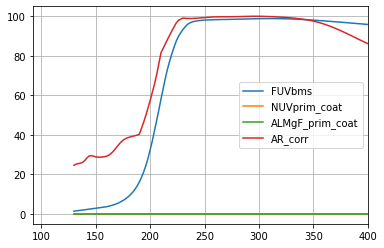

In [4]:
l=data[0]
from matplotlib import pyplot as pl
for i in [0,1,2,3]:
    pl.plot(l,spec[tlist[i]][1],label=tlist[i])

pl.xlim(None,400)
pl.grid()
pl.legend()

In [7]:
refl=[spec[tlist[i]][0] for i in range(4)]
tran=[spec[tlist[i]][1] for i in range(4)]

In [25]:
gmean=lambda x:x[np.isnan(x)==False].mean()
gmean(refl[1]*refl[1]/100)

20.00297505319149

In [24]:
x=refl[2]*refl[1]/100
x[(np.isnan(x)==False)*(l<180)].mean()

0.0

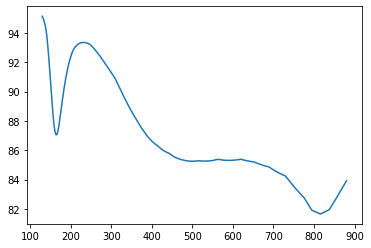

In [27]:
pl.plot(l,refl[2])

### ULTRASAT

- https://arxiv.org/pdf/2208.00159 all, out-of-band
- https://arxiv.org/abs/2108.02521 - detectors



In [6]:
ss=open("/home/limu/Space/calib/coatings_new.csv").readlines()[4].split(';')
wpos=[i for i,a in enumerate(ss) if a=='BOL']

In [8]:
ss=open("/home/limu/Space/calib/coatings_new.csv").readlines()[1].split(';')
ss[1::5]

['FUV/NUV beamsplitter @CaF2',
 'NUV enhanced mirror coatings',
 'FUV+NUV Al+MgF2 mirror coating',
 'AR on corrector lens',
 'NUV/VIS reflective filter',
 'FUV reflective filter',
 'NUV/VIS 220-300 nm trans. filter',
 'NUV1/NUV2 220-290/290-360 @45° BS ',
 '',
 '',
 '',
 '',
 '',
 '',
 'ZEMAX NUV Ta simulation',
 '\n']

In [12]:
ss=open("/home/limu/Space/calib/coatings_new.csv").readlines()[30].split(';')
ss

['BOL Ta  (%)"', '"Dual NUV refl. filter\n']

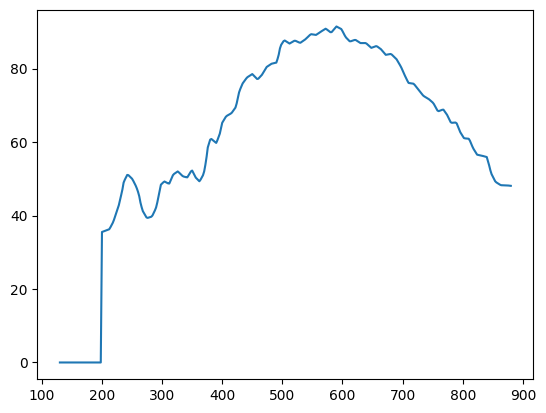

In [20]:
lam=data[0]
glam=lam[np.isnan(lam)==False]
gsen=data[-3][np.isnan(lam)==False]
from matplotlib import pyplot as pl
pl.plot(glam,gsen)